# Sistema de recomendación de películas

#### Partimos de una archivo csv con algo más de 11 millones de filas. El archivo contiene columnas: 'userId', 'rating', 'timestamp', 'movieId'. 

In [8]:
import pandas as pd
import numpy as np

# Leer el archivo completo
df = pd.read_csv('reviews.csv')

In [9]:
df.shape

(11024289, 4)

In [10]:
df.head(5)

,userId,rating,timestamp,movieId
0,1,1.0,1425941529,as680
1,1,4.5,1425942435,ns2186
2,1,5.0,1425941523,hs2381
3,1,5.0,1425941546,ns3663
4,1,5.0,1425941556,as9500


In [3]:
df.columns

Index(['user', 'rating', 'movie'], dtype='object')

##### Trabajar con los 11 millones de registros puede ser bastante costoso en términos de tiempo y recursos computacionales. Una opción sería tomar un subset representativo de los datos.

##### Una muestra aleatoria nos permitirá capturar la variabilidad general de los datos de manera más representativa, lo que nos ayudará a construir un modelo de recomendación más robusto y preciso.

##### Por otro lado, una muestra estratificada es útil cuando se tiene conocimiento previo de que algunas subpoblaciones son más importantes o más relevantes que otras. En este caso, como no tenemos un conocimiento previo de qué usuarios o películas son más importantes o relevantes, una muestra aleatoria es más adecuada.

#### La técnica de selección aleatoria simple es un método común para seleccionar una muestra de una población. En este método, cada individuo de la población tiene la misma probabilidad de ser seleccionado para formar parte de la muestra.

In [4]:
# Seleccionar una muestra aleatoria del 5% de los datos
df_subset = df.sample(frac=0.05, random_state=42)

# Verificar el tamaño del subset
print(df_subset.shape)

(551214, 3)


#### Limpieza de los datos

In [5]:
# Verificar valores faltantes en df original
print(df.isna().sum())

user      0
rating    0
movie     0
dtype: int64


In [6]:
# Verificar valores faltantes en df_subset
print(df_subset.isna().sum())

user      0
rating    0
movie     0
dtype: int64


In [7]:
# Verificar valores duplicados en df original
print(df.duplicated().sum())

75317


In [5]:
# Verificar valores duplicados en df_subset
print(df_subset.duplicated().sum())

0


In [8]:
# Eliminar valores duplicados en df original
df = df.drop_duplicates()

#### Análisis exploratorio de los datos

In [9]:
# para df original
print(df.describe())

             userId        rating     timestamp
count  1.102416e+07  1.102416e+07  1.102416e+07
mean   8.997232e+04  3.533454e+00  1.172542e+09
std    8.686591e+04  1.059692e+00  2.056765e+08
min    1.000000e+00  5.000000e-01  7.896520e+08
25%    2.855800e+04  3.000000e+00  9.901882e+08
50%    5.684300e+04  3.500000e+00  1.153612e+09
75%    1.168670e+05  4.000000e+00  1.360470e+09
max    2.708960e+05  5.000000e+00  1.501827e+09


In [6]:
# para df_subset 
print(df_subset.describe())

              userId         rating     timestamp
count  551214.000000  551214.000000  5.512140e+05
mean    90052.634893       3.532793  1.172591e+09
std     86925.396254       1.059849  2.055303e+08
min         1.000000       0.500000  7.896520e+08
25%     28528.000000       3.000000  9.907285e+08
50%     56873.000000       3.500000  1.153613e+09
75%    116933.000000       4.000000  1.360204e+09
max    270896.000000       5.000000  1.501824e+09


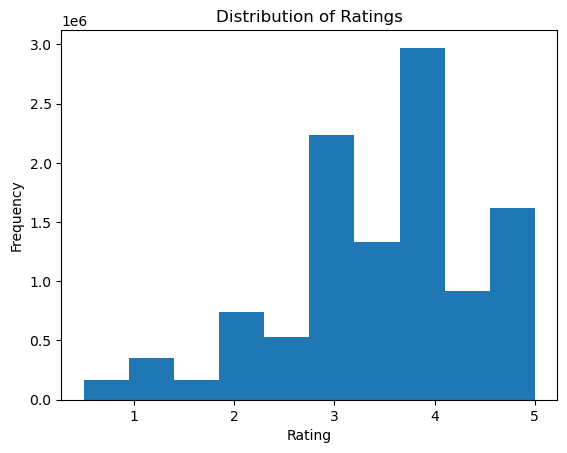

In [10]:
import matplotlib.pyplot as plt

plt.hist(df['rating'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()


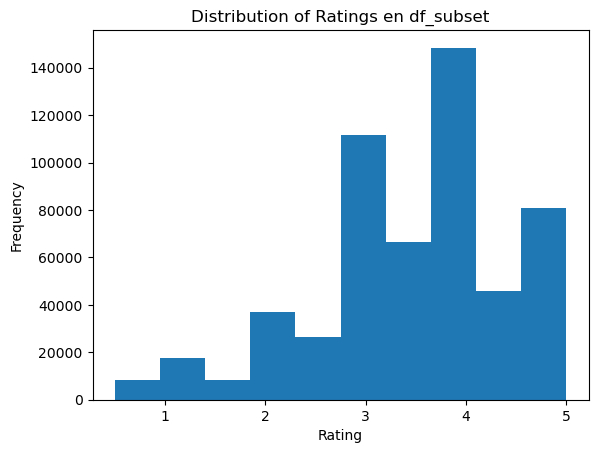

In [7]:
import matplotlib.pyplot as plt

plt.hist(df_subset['rating'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings en df_subset')
plt.show()

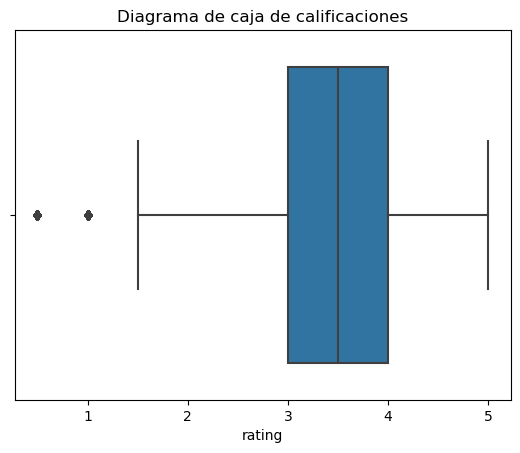

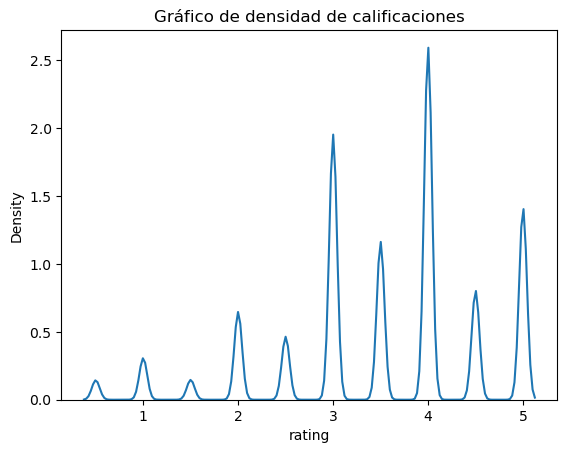

In [11]:
# Para df original

import seaborn as sns
import matplotlib.pyplot as plt

# Diagrama de caja de las calificaciones
sns.boxplot(x=df['rating'])
plt.title('Diagrama de caja de calificaciones')
plt.show()

# Gráfico de densidad de las calificaciones
sns.kdeplot(df['rating'])
plt.title('Gráfico de densidad de calificaciones')
plt.show()


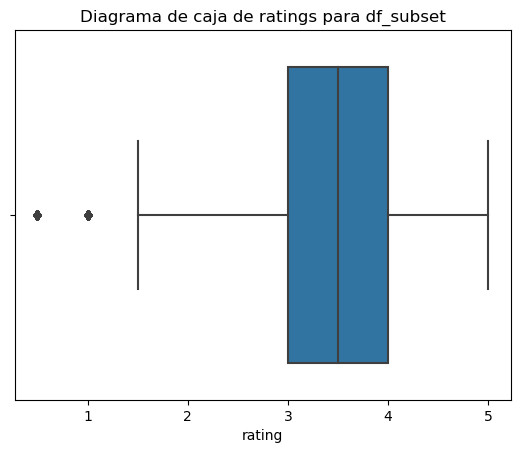

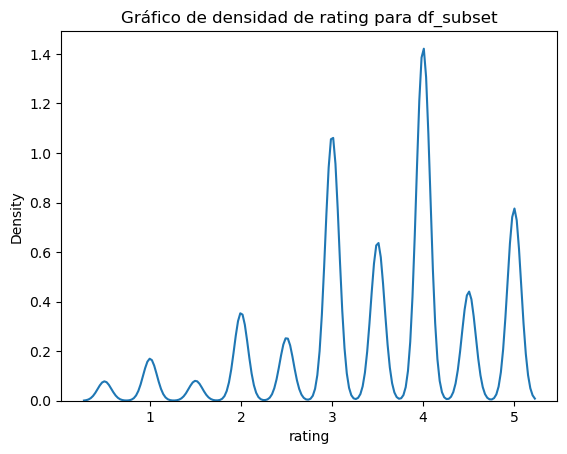

In [8]:
# Para df_subset 

import seaborn as sns
import matplotlib.pyplot as plt

# Diagrama de caja de las calificaciones
sns.boxplot(x=df_subset['rating'])
plt.title('Diagrama de caja de ratings para df_subset')
plt.show()

# Gráfico de densidad de las calificaciones
sns.kdeplot(df_subset['rating'])
plt.title('Gráfico de densidad de rating para df_subset')
plt.show()


In [15]:
# Calcular la frecuencia de los diferentes ratings
rating_counts = df_subset['rating'].value_counts()

# Mostrar la frecuencia de los diferentes ratings
print(rating_counts)

4.0    148453
3.0    111647
5.0     80769
3.5     66719
4.5     45918
2.0     36994
2.5     26508
1.0     17681
1.5      8378
0.5      8147
Name: rating, dtype: int64


In [23]:
# Agrupar el dataframe por película y calcular el número de calificaciones y la puntuación promedio

movie_stats = df_subset.groupby('movieId').agg({'rating': [np.size, np.mean]})
movie_stats.columns = ['_'.join(col).strip() for col in movie_stats.columns.values]

# Imprimir las películas más populares (ordenadas por número de calificaciones en orden descendente)
print("Películas más vistas (asumiendo esto por el número de usuarios que emitieron calificación)")
print(movie_stats.sort_values(('rating_size'), ascending=False).head())
print('')

# Imprimir las películas con mejor puntuación promedio (ordenadas por puntuación promedio en orden descendente)
print("Películas con mejores puntajes ('ratings')")
print(movie_stats.sort_values(('rating_mean'), ascending=False).head())


Películas más vistas (asumiendo esto por el número de usuarios que emitieron calificación)
         rating_size  rating_mean
movieId                          
ns1500            46     3.315217
ns8519            45     3.466667
hs1892            44     3.579545
hs2109            44     3.431818
as843             43     3.674419

Películas con mejores puntajes ('ratings')
         rating_size  rating_mean
movieId                          
as6665            16     4.375000
as1624            13     4.346154
ns1021            20     4.325000
ds234             23     4.304348
as45              15     4.300000


In [24]:
df_subset.to_csv('subset.csv')

In [32]:
data = df_subset.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551214 entries, 7701246 to 9725953
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     551214 non-null  int64  
 1   rating     551214 non-null  float64
 2   timestamp  551214 non-null  int64  
 3   movieId    551214 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 21.0+ MB


### Modelado

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

# Pivot table para crear una matriz de películas x usuarios
pivot = data.pivot_table(index='movieId', columns='userId', values='rating')

# Llenar valores faltantes con 0
pivot.fillna(0, inplace=True)

# Calcular la similitud de coseno entre películas
item_similarity = cosine_similarity(pivot.T)


MemoryError: Unable to allocate 14.1 GiB for an array with shape (22998, 82578) and data type float64

In [22]:
import pandas as pd
import numpy as np
df = pd.read_csv('subset.csv')

In [23]:
df['rating'].unique()

array([5. , 4.5, 4. , 3.5, 2.5, 3. , 0.5, 2. , 1. , 1.5])

In [24]:
from surprise import Reader

# Definir el Reader para el conjunto de datos
reader = Reader(rating_scale=(1, 5))

# Mapear los valores de 'rating' utilizando un diccionario
rating_scale = {0.5: 1, 1.0: 1, 1.5: 2, 2.0: 2, 2.5: 3, 3.0: 3, 3.5: 4, 4.0: 4, 4.5: 5, 5.0: 5}

# Aplicar el mapeo a la columna 'rating' del dataframe
df['rating'] = df['rating'].apply(lambda x: rating_scale[x])

# Imprimir los valores únicos en la columna 'rating' para verificar que se escaló correctamente
print(df['rating'].unique())

[5 4 3 1 2]


In [25]:
df = df.drop(['Unnamed: 0', 'timestamp'], axis=1)

In [26]:
df.to_csv('subset_listo.csv', index=False)

In [27]:
df = pd.read_csv('subset_listo.csv')

In [28]:
df.columns

Index(['userId', 'rating', 'movieId'], dtype='object')

In [29]:
from surprise import Dataset, Reader
from surprise import SVD
from surprise.model_selection import cross_validate

# Cargar los datos desde el dataframe 'data' utilizando el Reader
O_Dataset = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

# Definir el modelo SVD
model1 = SVD()

# Evaluar el modelo utilizando validación cruzada
cross_validate(model1, O_Dataset, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0242  1.0243  1.0257  1.0258  1.0238  1.0248  0.0008  
MAE (testset)     0.8105  0.8107  0.8123  0.8118  0.8108  0.8112  0.0007  
Fit time          15.39   15.70   15.58   15.70   16.15   15.70   0.25    
Test time         2.98    2.95    2.95    2.45    2.94    2.85    0.20    


{'test_rmse': array([1.02419214, 1.0243171 , 1.0256858 , 1.02582885, 1.02383699]),
 'test_mae': array([0.81045418, 0.81067977, 0.81231001, 0.81184842, 0.8107836 ]),
 'fit_time': (15.386035919189453,
  15.700997591018677,
  15.58381986618042,
  15.704992532730103,
  16.148995399475098),
 'test_time': (2.9809906482696533,
  2.9472086429595947,
  2.945997714996338,
  2.453207015991211,
  2.943049192428589)}

    """
    El modelo SVD que has corrido es un modelo básico y su rendimiento puede ser evaluado utilizando métricas como RMSE (Error cuadrático medio) y MAE (Error absoluto medio) obtenidos a través de la validación cruzada. En general, un modelo con menor RMSE y MAE es considerado mejor que uno con valores más altos.

Para este primer modelo el RMSE obtenido es de alrededor de 1.02, lo que sugiere que el modelo tiene un error promedio de aproximadamente 1 punto en su capacidad para predecir las calificaciones de películas para un usuario dado. 

El MAE obtenido es de alrededor de 0.8, lo que sugiere que, en promedio, el modelo se equivoca en aproximadamente 0.8 puntos en su capacidad para predecir las calificaciones de películas para un usuario dado.
    """

#### búsqueda en cuadrícula para encontrar los mejores hiperparámetros para el modelo SVD utilizando validación cruzada. Los hiperparámetros que se prueban son el número de factores latentes y la tasa de regularización.

##### Los hiperparámetros que se prueban en la búsqueda en cuadrícula se seleccionan de acuerdo con la experiencia previa, la documentación y los conocimientos del problema. En este caso, los valores (50, 100, 150) para n_factors y (0.02, 0.05, 0.1) para reg_all se pueden considerar como valores comunes que se prueban en la optimización de modelos basados en factorización de matrices, como el algoritmo SVD utilizado en este caso. Estos valores son solo una elección común y es posible que haya otros valores que funcionen mejor para un conjunto de datos específico. Por lo tanto, se pueden probar diferentes valores para estos hiperparámetros y comparar los resultados para elegir los mejores.

In [31]:
from surprise import SVD
from surprise.model_selection import GridSearchCV

# Definir los hiperparámetros a probar
param_grid = {'n_factors': [50, 100, 150], 'reg_all': [0.02, 0.05, 0.1]}

# Definir una función lambda que crea un objeto SVD con los hiperparámetros específicos
svd = lambda n_factors, reg_all: SVD(n_factors=n_factors, reg_all=reg_all)

# Definir la búsqueda en cuadrícula
grid_search = GridSearchCV(svd, param_grid, measures=['rmse'], cv=5)

# Entrenar el modelo con la búsqueda en cuadrícula
grid_search.fit(O_Dataset)

# Imprimir los mejores resultados
print(grid_search.best_score['rmse'])
print(grid_search.best_params['rmse'])


1.0194586154107728
{'n_factors': 50, 'reg_all': 0.1}


#### Recapitulando lo que se ha hecho hasta el momento

##### Para empezar, se cargó el archivo completo y se extrajo una muestra aleatoria del 5% de los datos utilizando Pandas. Posteriormente, se verificaron los valores faltantes y duplicados en la muestra y se eliminaron los valores duplicados del conjunto de datos original.

##### Después se realizó un análisis exploratorio de los datos y se observó que la distribución de calificaciones de la muestra estaba sesgada hacia calificaciones más altas, y se graficaron la distribución de calificaciones, el diagrama de caja y el gráfico de densidad.

##### continuación, se agrupó el conjunto de datos por película y se calculó el número de calificaciones y la puntuación promedio. Se identificaron las películas más populares, definidas por el número de usuarios que emitieron una calificación, y las películas con mejores puntuaciones promedio.

##### Se procedió a trabajar con una muestra más pequeña para crear la matriz de similitud de coseno entre películas, pero debido a la gran cantidad de memoria que se requería, se decidió utilizar otro enfoque con el paquete Surprise de Python para crear un modelo de recomendación basado en factorización de matrices utilizando el algoritmo SVD.

##### Se escaló la columna de calificaciones y se eliminaron columnas innecesarias. Luego se utilizó GridSearchCV para encontrar los mejores valores de hiperparámetros para el modelo SVD y se evaluó el modelo utilizando validación cruzada. Los resultados indicaron que el modelo tiene un RMSE promedio de 1.02, lo que sugiere que el modelo tiene cierto error en sus predicciones.

##### con los datos y pasos que se han tomado hasta ahora (carga y limpieza de datos, selección de muestra, preparación de los datos para el modelo), se está en un buen camino para desarrollar un modelo de recomendación que pueda generar predicciones de calificaciones para películas basado en el historial de calificaciones de los usuarios.

### Entrenamiento del modelo

##### Primero vamos a preparar el archivo con todos los registros (el de los 11 millones)

In [32]:
pandita = pd.read_csv('reviews.csv')

In [34]:
pandita = pandita.drop(['timestamp'], axis=1)

In [35]:
from surprise import Reader

# Definir el Reader para el conjunto de datos
reader = Reader(rating_scale=(1, 5))

# Mapear los valores de 'rating' utilizando un diccionario
rating_scale = {0.5: 1, 1.0: 1, 1.5: 2, 2.0: 2, 2.5: 3, 3.0: 3, 3.5: 4, 4.0: 4, 4.5: 5, 5.0: 5}

# Aplicar el mapeo a la columna 'rating' del dataframe
pandita['rating'] = pandita['rating'].apply(lambda x: rating_scale[x])

# Imprimir los valores únicos en la columna 'rating' para verificar que se escaló correctamente
print(pandita['rating'].unique())

[1 5 4 3 2]


In [42]:
pandita.columns

Index(['userId', 'rating', 'movieId'], dtype='object')

In [45]:
pandita.isnull().sum()

userId     0
rating     0
movieId    0
dtype: int64

In [37]:
pandita.to_csv('reviews_converted.csv', index=False)

In [47]:
joi = pd.read_csv('reviews_converted.csv')

In [52]:
joi.head(1)

,userId,rating,movieId
0,1,1,as680


##### Ahora vamos a cargar el objeto dataset y vamos a entrenar al modelo

In [51]:
from surprise import Reader, Dataset
from surprise import SVD
import numpy as np
from scipy.sparse import csr_matrix

# Definir el Reader para el conjunto de datos
reader = Reader(line_format='user rating item', sep=',', rating_scale=(1, 5), skip_lines=1)

# Cargar el conjunto de datos completo
full_data = Dataset.load_from_file('reviews_converted.csv', reader=reader)

# Definir el modelo SVD con los hiperparámetros óptimos
model = SVD(n_factors=50, reg_all=0.1)

# Entrenar el modelo con todos los datos disponibles
trainset = full_data.build_full_trainset()
model.fit(trainset)


##### <surprise.prediction_algorithms.matrix_factorization.SVD at 0x18e69071c70> Significa que el modelo SVD fue entrenado correctamente con todos los datos disponibles y almacenado en la variable model. Ahora se puede utilizar este modelo para hacer predicciones de calificaciones de películas para usuarios.

##### Una forma de hacer esto es utilizando el método predict del modelo SVD. Por ejemplo, si se quiere hacer una predicción para la calificación que el usuario 1000 le daría a la película 500, se puede hacer así:

In [53]:
checa = pd.read_csv('subset_listo.csv')
checa.head(5)

,userId,rating,movieId
0,251314,5,hs425
1,31407,5,as3335
2,39224,4,as6029
3,57048,4,as9337
4,72886,4,ns1
